# Predicting Sales with Users' First Impression

This notebook uses Random Forest Regression to predict the number of days to get the next 10 reviews with users' first impression on the product rating. A user's first impression is defined as the overall rating and the eight top-voted reviews, as these are the ratings a user would see without clicking 'View more reviews'. The dataset was preprocessed in microwave.ipynb

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [52]:
#read a preprocessed dataset
df = pd.read_csv('/Users/jiaying/Downloads/MCM2020/prep_microwave.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.dropna()
df

,avg_rating,1,2,3,4,5,period
0,4.250000,0.0,0.0,1.0,4.0,3.0,48.0
1,3.923077,0.0,0.0,1.0,4.0,3.0,53.0
2,3.928571,0.0,0.0,1.0,5.0,2.0,53.0
3,4.000000,0.0,0.0,0.0,5.0,3.0,51.0
4,4.052632,0.0,0.0,0.0,5.0,3.0,18.0
...,...,...,...,...,...,...,...
89,4.052632,0.0,0.0,0.0,5.0,3.0,18.0
90,3.880000,1.0,0.0,0.0,4.0,3.0,23.0
91,3.756757,1.0,0.0,0.0,4.0,3.0,25.0
92,3.899194,0.0,0.0,1.0,4.0,3.0,9.0


In [53]:
#seperate training and evaluation data
y_val= df['period']
x_data=df.drop("period",axis=1)
X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_val,test_size=0.3,random_state=42)

In [34]:
#normalization
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

scaler_model.fit(X_eval)
X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [36]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 15)
# Train the model on training data
rf.fit(X_train, y_train);

In [37]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_eval)
# Calculate the absolute errors
errors = abs(predictions - y_eval)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.25 degrees.


In [38]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors /y_eval))
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.05 %.


In [39]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: avg_rating           Importance: 0.42
Variable: 5                    Importance: 0.31
Variable: 4                    Importance: 0.26
Variable: 1                    Importance: 0.01
Variable: 3                    Importance: 0.01
Variable: 2                    Importance: 0.0


[None, None, None, None, None, None]

# Robustness Test

From the analysis below we can see that the evaluation accuracy is consistent (with a difference in smaller than 0.01) across different choices of parameters including the number of etimators and the number of random state. 

In [46]:
def RandomF(n_estimators,random_state):
    #random forest
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_eval)
    # Calculate the absolute errors
    errors = abs(predictions - y_eval)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors /y_eval))
    # Calculate and display accuracy
    accuracy = 100 - mape
    accuracy = round(accuracy,2)
    return accuracy  

In [47]:
n_est = [200*i for i in range(1,10)]
ran_state = [5*i for i in range(20)]

In [48]:
acc_13 = []
for i in n_est:
    a = RandomF(i,13)
    acc_13.append(a)

In [49]:
acc_40 = []
for i in n_est:
    a = RandomF(i,40)
    acc_40.append(a)

Text(0.5, 1.0, 'Accuracy with random_state=13(green) and 40(orange)')

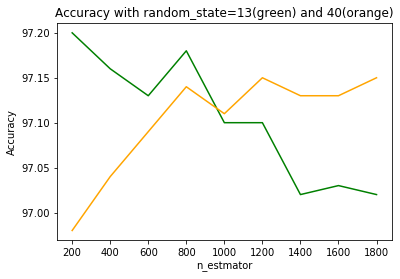

In [44]:
plt.plot(n_est,acc_13,color='g')
plt.plot(n_est,acc_40,color='orange')
plt.xlabel('n_estmator')
plt.ylabel('Accuracy')
plt.title('Accuracy with random_state=13(green) and 40(orange)')

Text(0.5, 1.0, 'Accuracy with n_estimator=1000(green) and 500(orange)')

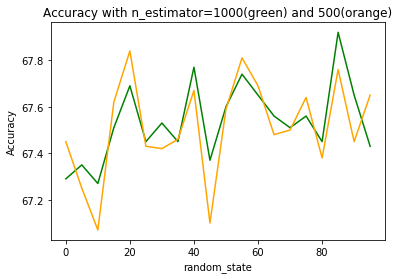

In [220]:
plt.plot(ran_state,acc_1000,color='g')
plt.plot(ran_state,acc_500,color='orange')
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.title('Accuracy with n_estimator=1000(green) and 500(orange)')